In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
from sklearn.datasets import make_classification

In [9]:
X,y=make_classification(n_samples=1000,n_features=2,n_informative=2,n_classes=2,n_clusters_per_class=1,n_redundant=0,random_state=42)

In [10]:
df=pd.DataFrame(X)

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

<Axes: xlabel='0', ylabel='1'>

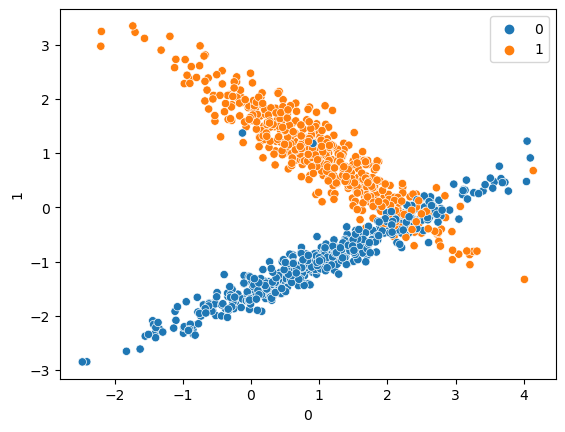

In [11]:
sns.scatterplot(x=df[0],y=df[1],hue=y)

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [13]:
from sklearn.svm import SVC

### try differnet kernels for better accuracy 

In [14]:
## use kernel=linear in svc
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred1=svc.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
score=accuracy_score(y_test,y_pred1)
print(score)
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.912
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       124
           1       0.99      0.83      0.91       126

    accuracy                           0.91       250
   macro avg       0.92      0.91      0.91       250
weighted avg       0.92      0.91      0.91       250

[[123   1]
 [ 21 105]]


In [16]:
## kernel='rbf'
rbfsvc=SVC(kernel='rbf')
rbfsvc.fit(X_train,y_train)
y_pred2=rbfsvc.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
score=accuracy_score(y_test,y_pred2)
print(score)
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.916
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       124
           1       0.99      0.84      0.91       126

    accuracy                           0.92       250
   macro avg       0.93      0.92      0.92       250
weighted avg       0.93      0.92      0.92       250

[[123   1]
 [ 20 106]]


In [18]:
## kernal=poly
polysvc=SVC(kernel='poly')
polysvc.fit(X_train,y_train)
y_pred3=polysvc.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
score=accuracy_score(y_test,y_pred3)
print(score)
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.9
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       124
           1       0.95      0.85      0.90       126

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

[[118   6]
 [ 19 107]]


In [20]:
## kernal=sigmoid
sigsvc=SVC(kernel='sigmoid')
sigsvc.fit(X_train,y_train)
y_pred4=sigsvc.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
score=accuracy_score(y_test,y_pred4)
print(score)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

0.896
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       124
           1       0.95      0.83      0.89       126

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

[[119   5]
 [ 21 105]]


## Hyperparameter tunning

In [33]:
param=dict(C=[0.1,1,10,100,1000,10000],gamma=[0.1,0.01,0.001,0.0001],kernel=['linear','rbf','poly'])

In [34]:
param

{'C': [0.1, 1, 10, 100, 1000, 10000],
 'gamma': [0.1, 0.01, 0.001, 0.0001],
 'kernel': ['linear', 'rbf', 'poly']}

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
from sklearn.svm import SVC
model=SVC()

In [37]:
grid=GridSearchCV(estimator=model,param_grid=param,n_jobs=-1)

In [38]:
grid.fit(X_train,y_train)
y_pred = grid.predict(X_test)

In [39]:
grid

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly']})

In [42]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
score=accuracy_score(y_test,y_pred)
print(score)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.94
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       124
           1       0.98      0.90      0.94       126

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

[[122   2]
 [ 13 113]]


In [43]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [44]:
grid.best_estimator_

SVC(C=1000, gamma=0.1)